In [2]:
import numpy as np
import pandas as pd

In [3]:
arr1 = np.array([1, None, 3, 4])
arr1.dtype

dtype('O')

In [4]:
arr2 = np.array([1, 2, 3, 4])
arr2.dtype

dtype('int32')

In [5]:
arr3 = np.array([1, np.nan, 3, 4])
arr3.dtype

dtype('float64')

In [6]:
np.nansum(arr3)

8.0

In [7]:
np.nanmin(arr3)

1.0

In [8]:
ser = pd.Series([1, np.nan, '2', None])
print(ser, '\n')
ser.isnull()

0       1
1     NaN
2       2
3    None
dtype: object 



0    False
1     True
2    False
3     True
dtype: bool

In [9]:
pd.Series([1, np.nan, 'hello', None])
ser.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [10]:
df = pd.DataFrame([[1, 2, 2 , 5], [2, 3, 5 , np.nan], [np.nan, 4, 6, np.nan]])

df.dropna(axis = 'rows')

,0,1,2,3
0,1.0,2,2,5.0


In [11]:
df.dropna(how='any')

,0,1,2,3
0,1.0,2,2,5.0


In [12]:
df.dropna(axis = 'rows', thresh = 3)

,0,1,2,3
0,1.0,2,2,5.0
1,2.0,3,5,NaN


In [13]:
ser.fillna(0)

0    1
1    0
2    2
3    0
dtype: object

In [14]:
ser.fillna(method = 'ffill')

0    1
1    1
2    2
3    2
dtype: object

In [15]:
ser.fillna(method = 'bfill')

0       1
1       2
2       2
3    None
dtype: object

In [5]:
from pandas import datetime
import matplotlib.pyplot as plt

<ipython-input-5-c405c21413d0>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [6]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = 'C:/data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

In [20]:
img_locf = df['CO(GT)'].copy().ffill()
img_locf
img_nocb = df['CO(GT)'].copy().bfill()
img_nocb

Datetime
2004-03-10 18:00:00    2.6
2004-03-10 19:00:00    2.0
2004-03-10 20:00:00    2.2
2004-03-10 21:00:00    2.2
2004-03-10 22:00:00    1.6
                      ... 
2005-04-04 10:00:00    3.1
2005-04-04 11:00:00    2.4
2005-04-04 12:00:00    2.4
2005-04-04 13:00:00    2.1
2005-04-04 14:00:00    2.2
Name: CO(GT), Length: 9357, dtype: float64

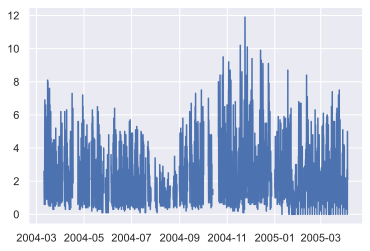

In [23]:
plt.plot(df['CO(GT)'], label = 'actual', zorder=10)

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
%config InlineBackend.figure_format = 'svg'

In [26]:
imp_linear = df['CO(GT)'].copy().interpolate()
imp_linear

Datetime
2004-03-10 18:00:00    2.6
2004-03-10 19:00:00    2.0
2004-03-10 20:00:00    2.2
2004-03-10 21:00:00    2.2
2004-03-10 22:00:00    1.6
                      ... 
2005-04-04 10:00:00    3.1
2005-04-04 11:00:00    2.4
2005-04-04 12:00:00    2.4
2005-04-04 13:00:00    2.1
2005-04-04 14:00:00    2.2
Name: CO(GT), Length: 9357, dtype: float64

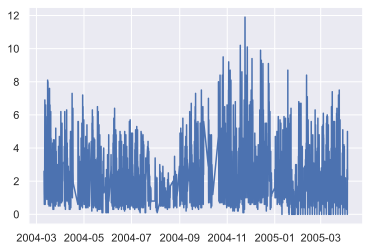

In [27]:
plt.plot(imp_linear, label='linear interpolation', zorder=3)